In [1]:
from __future__ import print_function
import keras
from keras.models import Sequential, Model, load_model
from keras import backend as K
import tensorflow as tf
import isolearn.keras as iso
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from keras.utils import plot_model


from aparent.predictor import *
##################################################
#import bioPython for working with FASTA files
from Bio import SeqIO
##################################################


Using TensorFlow backend.
/home/lafleur1/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lafleur1/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lafleur1/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/lafleur1/.local/lib/python3.6/site-packages/tensorflo

In [2]:
#open the FASTA for GL000219.1 (https://www.ncbi.nlm.nih.gov/nuccore/GL000219.1?report=fasta) unplaced human genomic assembly

#bioPython instructions http://biopython.org/DIST/docs/tutorial/Tutorial.html 
contigSeq = SeqIO.read("GL000219.1.fasta", "fasta")
seq = contigSeq.seq #actual genomic sequence from the file
print (len(seq))

179198


In [3]:
#loading model
aparent_model = load_model('./saved_models/aparent_large_lessdropout_all_libs_no_sampleweights.h5')
plot_model(aparent_model, show_shapes = True, to_file='APARENTmodel.png')
aparent_encoder = get_aparent_encoder(lib_bias=4)


/home/lafleur1/.local/lib/python3.6/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


BEGIN

Striding over subsequence [0, 205] (Total length = 210)...
GAATTCTACCTGTGGGACAAACATTGAGACCTTTGTAACATTGTTCTGGAATGCTAAGTGAGGGACAAACATTCAGAACCCAGCGGGAGTGTTCTGGAATCCTATGTGAGGGACATACATTCAGACCATAGCAGCAGTGTTCTGGAATCCTATGTGTGGGACAAACATTCAGACCCTCGTAGCAGTGTTCTGGAATCCTATGTGA
[[8.20673961e-07 9.99200665e-07 1.06684581e-06 1.53425208e-06
  2.13329781e-06 2.92259847e-06 3.81190011e-06 8.27788881e-06
  3.09681036e-06 5.28862074e-06 7.24709616e-06 6.95330573e-06
  1.20000705e-05 1.01770647e-05 1.32782434e-05 1.80434672e-05
  2.40971403e-05 2.16700937e-05 1.50372416e-05 1.73665212e-05
  1.26525110e-05 9.58798773e-06 1.30794660e-05 1.04818610e-05
  9.08563106e-06 1.16835736e-05 4.27709019e-05 1.66100453e-05
  3.09529678e-05 1.64737939e-05 2.99910371e-05 2.76940391e-05
  1.80946809e-05 1.70823150e-05 5.05766548e-05 2.30226833e-05
  3.33520366e-05 3.57824320e-05 9.90753415e-06 5.07487093e-05
  1.59167612e-05 3.35634868e-05 7.40561745e-06 5.02822768e-05
  1.75011592e-05 3.33764401e-05 1.51745735e-05

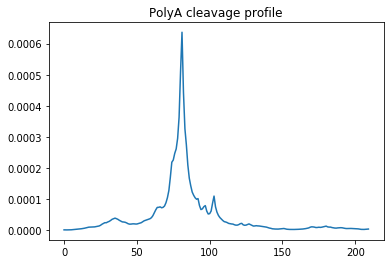

In [4]:
#detecting peaks with signal smoothing for 

chunk = seq[0:210]

#predict where polyA will occur based on values of cut site predictions from APARENT model
peak_ixs, polya_profile = find_polya_peaks(
    aparent_model,
    aparent_encoder,
    chunk,
    sequence_stride=1,
    conv_smoothing=True,
    peak_min_height=0.01,
    peak_min_distance=50,
    peak_prominence=(0.01, None)
)

print("Peak positions = " + str(peak_ixs))
print("PolyA profile shape = " + str(polya_profile.shape))
print (max(polya_profile))
print (sum(polya_profile))

x_data = np.arange(0,len(chunk))
plt.plot(x_data, polya_profile)
plt.title("PolyA cleavage profile")
plt.show()

BEGIN
Striding over subsequence [0, 205] (Total length = 210)...
GAATTCTACCTGTGGGACAAACATTGAGACCTTTGTAACATTGTTCTGGAATGCTAAGTGAGGGACAAACATTCAGAACCCAGCGGGAGTGTTCTGGAATCCTATGTGAGGGACATACATTCAGACCATAGCAGCAGTGTTCTGGAATCCTATGTGTGGGACAAACATTCAGACCCTCGTAGCAGTGTTCTGGAATCCTATGTGA
[[8.20673961e-07 9.99200665e-07 1.06684581e-06 1.53425208e-06
  2.13329781e-06 2.92259847e-06 3.81190011e-06 8.27788881e-06
  3.09681036e-06 5.28862074e-06 7.24709616e-06 6.95330573e-06
  1.20000705e-05 1.01770647e-05 1.32782434e-05 1.80434672e-05
  2.40971403e-05 2.16700937e-05 1.50372416e-05 1.73665212e-05
  1.26525110e-05 9.58798773e-06 1.30794660e-05 1.04818610e-05
  9.08563106e-06 1.16835736e-05 4.27709019e-05 1.66100453e-05
  3.09529678e-05 1.64737939e-05 2.99910371e-05 2.76940391e-05
  1.80946809e-05 1.70823150e-05 5.05766548e-05 2.30226833e-05
  3.33520366e-05 3.57824320e-05 9.90753415e-06 5.07487093e-05
  1.59167612e-05 3.35634868e-05 7.40561745e-06 5.02822768e-05
  1.75011592e-05 3.33764401e-05 1.51745735e-05 

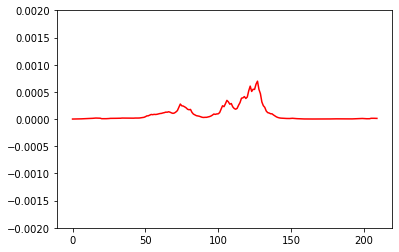

In [9]:
#detecting peaks w/o signal smoothing

peak_ixs, polya_profile2 = find_polya_peaks(
    aparent_model,
    aparent_encoder,
    chunk,
    sequence_stride=20,
    conv_smoothing=True,
    peak_min_height=0.01,
    peak_min_distance=50,
    peak_prominence=(0.01, None)
)

print("Peak positions = " + str(peak_ixs))
print("PolyA profile shape = " + str(polya_profile.shape))
print (max(polya_profile2))

x_data = np.arange(0,len(chunk))
#plt.scatter(x_data, polya_profile)

plt.plot(x_data, polya_profile2, c = "r")

plt.ylim(-0.002,0.002)
plt.show()


BEGIN
Striding over subsequence [0, 205] (Total length = 210)...
GAATTCTACCTGTGGGACAAACATTGAGACCTTTGTAACATTGTTCTGGAATGCTAAGTGAGGGACAAACATTCAGAACCCAGCGGGAGTGTTCTGGAATCCTATGTGAGGGACATACATTCAGACCATAGCAGCAGTGTTCTGGAATCCTATGTGTGGGACAAACATTCAGACCCTCGTAGCAGTGTTCTGGAATCCTATGTGA
[[8.20673961e-07 9.99200665e-07 1.06684581e-06 1.53425208e-06
  2.13329781e-06 2.92259847e-06 3.81190011e-06 8.27788881e-06
  3.09681036e-06 5.28862074e-06 7.24709616e-06 6.95330573e-06
  1.20000705e-05 1.01770647e-05 1.32782434e-05 1.80434672e-05
  2.40971403e-05 2.16700937e-05 1.50372416e-05 1.73665212e-05
  1.26525110e-05 9.58798773e-06 1.30794660e-05 1.04818610e-05
  9.08563106e-06 1.16835736e-05 4.27709019e-05 1.66100453e-05
  3.09529678e-05 1.64737939e-05 2.99910371e-05 2.76940391e-05
  1.80946809e-05 1.70823150e-05 5.05766548e-05 2.30226833e-05
  3.33520366e-05 3.57824320e-05 9.90753415e-06 5.07487093e-05
  1.59167612e-05 3.35634868e-05 7.40561745e-06 5.02822768e-05
  1.75011592e-05 3.33764401e-05 1.51745735e-05 

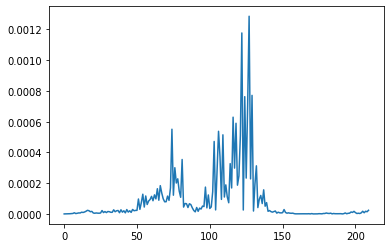

In [6]:
#detecting peaks
#playing with aparent.predict -> what is happening in there???


peak_ixs, polya_profile = find_polya_peaks(
    aparent_model,
    aparent_encoder,
    chunk,
    sequence_stride=20,
    conv_smoothing=False,
    peak_min_height=0.01,
    peak_min_distance=50,
    peak_prominence=(0.01, None)
)

print("Peak positions = " + str(peak_ixs))
print("PolyA profile shape = " + str(polya_profile.shape))
print (max(polya_profile))

x_data = np.arange(0,len(chunk))
plt.plot(x_data, polya_profile)

plt.show()